In [30]:
# Authors: Yann N. Dauphin, Vlad Niculae, Gabriel Synnaeve
# License: BSDhttps://github.com/aespresso/rbm_recommendation_system_attempt/blob/master/RBM_mnist_example.ipynb


import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone

from keras.datasets import fashion_mnist

(x_train_src, _), _ = fashion_mnist.load_data()
#Нормализуем данные
x_train = x_train_src.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28*28))

In [31]:
# Models we will use
rbm = BernoulliRBM(random_state=0, verbose=True, n_iter=100, n_components=25)
rbm.fit(x_train)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -251.49, time = 5.14s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -238.05, time = 5.66s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -227.39, time = 6.41s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -226.46, time = 6.58s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -227.44, time = 6.63s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -227.24, time = 6.14s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -223.04, time = 6.23s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -223.56, time = 6.09s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -226.61, time = 5.77s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -228.22, time = 6.02s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -223.12, time = 6.24s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -225.52, time = 6.96s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -217.24, time = 5.91s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -226.96, time = 5.54s
[BernoulliRBM] 

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=25, n_iter=100,
             random_state=0, verbose=True)

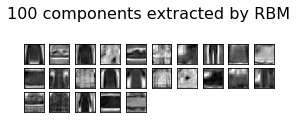

In [34]:
def show_results(input, output, n):
    fig, axs = plt.subplots(2, n)
    for i in range(0, n):
        axs[0, i].imshow(input[i])
        axs[0, i].axis('off')
        axs[1, i].imshow(output[i])
        axs[1, i].axis('off')

samples = x_train[20:30].copy()
gibbs = rbm.gibbs(samples)
gibbs = gibbs.reshape(len(samples), 28, 28)
samples = samples.reshape(len(samples), 28, 28)


# #############################################################################
# Plotting

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()